# Imports


In [37]:
import matplotlib.pyplot as plt
import math
import time

import numpy   as np
import pandas  as pd
import seaborn as sns



from sklearn.preprocessing    import  StandardScaler
from sklearn.model_selection  import  train_test_split
from sklearn.model_selection  import  StratifiedKFold
from sklearn.naive_bayes      import  GaussianNB
from sklearn.neighbors        import  KNeighborsClassifier
from sklearn.model_selection  import  GridSearchCV
from sklearn.neural_network   import  MLPClassifier
from sklearn.ensemble         import  RandomForestClassifier
from sklearn.svm              import  SVC
from sklearn.model_selection  import  KFold


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from mlxtend.feature_extraction  import  PrincipalComponentAnalysis  as  PCA
from mlxtend.feature_extraction  import  LinearDiscriminantAnalysis  as  LDA
from mlxtend.feature_selection   import  SequentialFeatureSelector   as  SFS



# Procesamiento de los datos


In [3]:
# Lineas para preprocesar el codigo de COMAS a PUNTOS

#DatasetOriginalParaProcesar = pd.read_csv('base_de_datos/SkillCraft1_Dataset.csv',decimal=",")
#DatasetOriginalParaProcesar .to_csv('base_de_datos/DatasetProcesado.csv', sep=',', encoding='utf-8', quotechar='"', decimal='.')


In [4]:
#Ruta local
Data = pd.read_csv('base_de_datos/DatasetProcesado.csv')

#Separamos la clase a clasificar de las caracteristicas
Ligas = Data.LeagueIndex.values


#Eliminamos la clase de las caracteristicas en general y la numeracion por defecto
Data.drop(["LeagueIndex"],axis=1,inplace=True)
Dataset = Data.values
Dataset = Dataset[:,1:20]

#Normalizamos
scaler = StandardScaler().fit(Dataset)
Caracteristicas = scaler.transform(Dataset)

#Tomamos las clases y las caracteristicas
X = Caracteristicas
Y = Ligas

In [5]:
df = pd.DataFrame(Dataset)
df[:20] 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,52.0,27.0,10.0,3000.0,143718.0000,0.003515,0.000220,7.0,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28.0,0.001397,6.0,0.000000,0.000000
1,55.0,23.0,10.0,5000.0,129.2322,0.003304,0.000259,4.0,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22.0,0.001194,5.0,0.000000,0.000208
2,56.0,30.0,10.0,200.0,69.9612,0.001101,0.000336,4.0,0.000294,0.000461,0.002926,44.6475,75.3548,4043.0000,22.0,0.000745,6.0,0.000000,0.000189
3,57.0,19.0,20.0,400.0,107.6016,0.001034,0.000213,1.0,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19.0,0.000426,7.0,0.000000,0.000384
4,58.0,32.0,10.0,500.0,122.8908,0.001136,0.000327,2.0,0.000000,0.001329,0.002368,22.6885,62.0813,9374.0000,15.0,0.001174,4.0,0.000000,0.000019
5,60.0,27.0,6.0,70.0,44457.0000,0.000978,0.000255,2.0,0.000000,0.000000,0.002425,76.4405,98.7719,3.0965,16.0,0.000372,6.0,0.000000,0.000000
6,61.0,21.0,8.0,240.0,46.9962,0.000820,0.000169,6.0,0.000000,0.000045,0.001988,94.0227,90.5311,4.1017,15.0,0.000573,5.0,0.000000,0.000000
7,72.0,17.0,42.0,10000.0,212.6022,0.009040,0.000676,6.0,0.001164,0.001253,0.004952,24.6117,41.7671,6.6104,45.0,0.002277,9.0,0.000129,0.000249
8,77.0,20.0,14.0,2708.0,117.4884,0.002944,0.000527,2.0,0.000019,0.000414,0.005399,52014.0000,46.4321,3.3746,29.0,0.001035,7.0,0.000273,0.000470
9,81.0,18.0,24.0,800.0,155.9856,0.005054,0.000524,8.0,0.000025,0.000399,0.003569,24.4632,52.1538,6.5664,27.0,0.001310,6.0,0.000000,0.000000


In [6]:
#Muestras por caracteristicas totales

X.shape

(3340, 19)

In [7]:
#Imprime las clases

print (np.unique(Y))

[1 2 3 4 5 6 7]


In [8]:
#Clases del data-set

for i in range(1, len(np.unique(Y)) + 1):
  print(str(" clase " + str(i)+ ": " + str(len(Y[Y==i]))))
  i = i+len( Y[Y==i] )
    

 clase 1: 167
 clase 2: 347
 clase 3: 553
 clase 4: 811
 clase 5: 806
 clase 6: 621
 clase 7: 35


In [9]:
#cantidad de muestras y caracteristicas

X.shape

(3340, 19)

In [10]:
#División en muestras de prueba(test) y entrenamiento globales

X_Entrenamiento, X_Prueba, Y_Entrenamiento, Y_Prueba = train_test_split( X, Y, test_size=0.3, random_state=0 )

print("Muestras de entrenamiento: " , len(X_Entrenamiento) )
print("Muestras de prueba:        " , len(X_Prueba)  )
print("Clases de entrenamiento:   " , len(Y_Entrenamiento) )
print("Clases de prueba:          " , len(Y_Prueba)  )


Muestras de entrenamiento:  2338
Muestras de prueba:         1002
Clases de entrenamiento:    2338
Clases de prueba:           1002


##  Auxiliares

In [1]:

#Metodo para comparar los valores del modelo con la muestra de test extraida
def Impresion( ModeloEntrenado, MediaEntrenamiento = 0, DesviacionMediaEntrenamiento = 0, MediaValidacion = 0, DesviacionMediaValidacion = 0, Tiempo = 0, ImpresionManual = True):
    
    

    PrediccionDelModelo = ModeloEntrenado.predict( X_Prueba )
    
    print('PRECISION     : ', accuracy_score( Y_Prueba, PrediccionDelModelo ) )
    print('CLASIFICACION : \n', classification_report( Y_Prueba, PrediccionDelModelo ) )
    

    #Clases de la matriz
    Columnas =['Clase %s'%(i) for i in range(1, len(np.unique(Y)) + 1)]
    
    #Matris de confusion
    MatrizDeConfusion    = confusion_matrix( Y_Prueba, PrediccionDelModelo, normalize = 'all' )
    df_MatrizDeConfusion = pd.DataFrame( MatrizDeConfusion , index = Columnas, columns = Columnas)
    
    Matriz = sns.heatmap( df_MatrizDeConfusion, cmap = 'Blues', annot = True, fmt = '.f',linecolor="k",linewidths=3 )
    Matriz.set(xlabel = 'Verdaderos', ylabel = 'Estimados')
    plt.title("Matriz de confusión",fontsize=30)

    
    #Impresion de valores Manuales
    if ImpresionManual == True:
         print(  'Eficiencia Entrenamiento : ' +  str( MediaEntrenamiento ) + ' +/- ' + str( DesviacionMediaEntrenamiento ))
         print(  'Eficiencia Validacion :    ' +  str( MediaValidacion)     + ' +/- ' + str( DesviacionMediaValidacion ))
         print(  'Tiempo :                   ' +  str(Tiempo))
    
    
    
   
    

SyntaxError: invalid syntax (<ipython-input-1-ebb84bba4843>, line 20)

# Algotirmos

## Bayes

In [84]:
#Naive Bayes

def naiveBayes( X_Train, Y_Train ):
    
    tiempo_i = time.time()
    
    Folds = StratifiedKFold( n_splits = 5 )
    EficienciaEntrenamiento  = np.zeros(5) 
    EficienciaValidacion     = np.zeros(5)
    
    Iteracion = 0
    #Subdivision en muestras de entrenamiento y validacion
    for Entrenamiento, Validacion in Folds.split( X_Train, Y_Train ):
        
        X_Entrenamiento, Y_Entrenamiento = X_Train[Entrenamiento], Y_Train[Entrenamiento]
        X_Validacion, Y_Validacion       = X_Train[Validacion], Y_Train[Validacion]
        
        Bayes = GaussianNB()
        Bayes.fit(X_Train, Y_Train)    
        
        PrediccionEntrenamiento = Bayes.predict( X_Entrenamiento )
        PrediccionValidacion    = Bayes.predict( X_Validacion )
    
        EficienciaEntrenamiento[ Iteracion ] = np.mean( PrediccionEntrenamiento.ravel() == Y_Entrenamiento.ravel() ) 
        EficienciaValidacion[ Iteracion ]    = np.mean( PrediccionValidacion.ravel()    == Y_Validacion.ravel() )
        
        Iteracion = Iteracion + 1

        
    MediaEficienciaEntrenamiento              = np.mean( EficienciaEntrenamiento )
    DesviacionEstandarEficienciaEntrenamiento = np.std( EficienciaEntrenamiento )
    
    MediaEficienciaValidacion              = np.mean( EficienciaValidacion )
    DesviacionEstandarEficienciaValidacion = np.std( EficienciaValidacion )
    Tiempo = time.time()- tiempo_i


    
    return  Bayes, MediaEficienciaEntrenamiento, DesviacionEstandarEficienciaEntrenamiento, MediaEficienciaValidacion, DesviacionEstandarEficienciaValidacion ,Tiempo
     
    
    #print(  'Efi validacion :  ' +  str(np.mean( EficienciaValidacion))     + '+/-' + str(np.std( EficienciaValidacion)))
    #print(  'Efi entrenamiento: '+  str(np.mean( EficienciaEntrenamiento )) + '+/-' + str(np.std( EficienciaEntrenamiento )))
    #print('Data: ' + str(np.std(errores))
    

PRECISION     :  0.26646706586826346
CLASIFICACION : 
               precision    recall  f1-score   support

           1       0.27      0.53      0.35        53
           2       0.18      0.46      0.26        90
           3       0.21      0.30      0.25       176
           4       0.00      0.00      0.00       250
           5       0.28      0.03      0.06       234
           6       0.39      0.70      0.50       189
           7       0.10      0.40      0.15        10

    accuracy                           0.27      1002
   macro avg       0.20      0.35      0.22      1002
weighted avg       0.21      0.27      0.20      1002

Eficiencia Entrenamiento : 0.26432797811802433 +/- 0.003264607002369046
Eficiencia Validacion :    0.2643203572539761 +/- 0.013057862043285786
Tiempo :                   0.023792028427124023


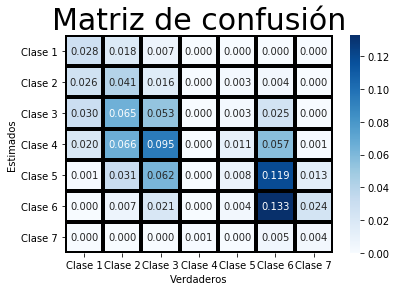

In [86]:

#Bayes, MediaEentrenamiento, DesviacionMediaEntrenamiento, MediaValidacion, DesviacionMediaValidacion = naiveBayes( X_Entrenamiento, Y_Entrenamiento)
#Impresion(Bayes, MediaEentrenamiento, DesviacionMediaEntrenamiento, MediaValidacion, DesviacionMediaValidacion)
#type(naiveBayes( X_Entrenamiento, Y_Entrenamiento))

Impresion(*(naiveBayes( X_Entrenamiento, Y_Entrenamiento)))



## K-NN

In [93]:
  #Preparamos los parametros del modelo
  KVecinos = KNeighborsClassifier()
  Valores  = { 'n_neighbors' : (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20), 'weights' :('uniform', 'distance') }#Revisar
  #Metricas = {'accuracy' : make_scorer }
  #Metricas = ['accuracy', 'precision','average_precision','recall']

     
    
  #Se toman los mejores valor
  #Grid = GridSearchCV( KVecinos, Valores, refit=True, cv=5, scoring = Metricas )
  Grid = GridSearchCV( KVecinos, Valores,  cv=5)
  Grid.fit( X_Entrenamiento, Y_Entrenamiento )
  
  
  MediasKnn              = Grid.cv_results_['mean_test_score']
  IntervalodeConfianza   = Grid.cv_results_['std_test_score']
  MejoresResultados      = Grid.best_params_

  print(MejoresResultados)


{'n_neighbors': 20, 'weights': 'distance'}


In [94]:
#df_types = pd.DataFrame({
 #   'Numero de vecinos' : pd.Series([1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11,12,12,13,13,14,14,15,15,16,16,17,17,18,18,19,19,20,20]),
  #  'Pesos': pd.Series(['uniform', 'distance']*20)
  #}
#)
#df_types.set_index(['Numero de vecinos', 'Pesos'], inplace=True)
#df_types["EficienciaEntrenamiento"]             = MediasKnn
#df_types["Intervalo de confianzaEntrenamiento"] = IntervalodeConfianza 
#df_types

In [95]:
df_KnnEntrenamiento = pd.DataFrame( Grid.cv_results_ )
df_KnnEntrenamiento = df_KnnEntrenamiento[['mean_fit_time','mean_test_score', 'std_test_score', 'param_n_neighbors','param_weights','rank_test_score']]
df_KnnEntrenamiento

,mean_fit_time,mean_test_score,std_test_score,param_n_neighbors,param_weights,rank_test_score
0,0.002754,0.266033,0.009332,1,uniform,36
1,0.002609,0.266033,0.009332,1,distance,36
2,0.002683,0.254910,0.018094,2,uniform,40
3,0.002565,0.266033,0.009332,2,distance,36
4,0.002489,0.261752,0.014025,3,uniform,39
5,0.003010,0.285287,0.006157,3,distance,33
6,0.002492,0.269453,0.025650,4,uniform,35
7,0.002911,0.293404,0.024429,4,distance,28
8,0.002884,0.282703,0.029153,5,uniform,34
9,0.002543,0.292548,0.014343,5,distance,29


PRECISION     :  0.3183632734530938
CLASIFICACION : 
               precision    recall  f1-score   support

           1       0.30      0.06      0.10        53
           2       0.18      0.18      0.18        90
           3       0.25      0.21      0.23       176
           4       0.31      0.40      0.35       250
           5       0.30      0.35      0.32       234
           6       0.51      0.43      0.47       189
           7       0.00      0.00      0.00        10

    accuracy                           0.32      1002
   macro avg       0.26      0.23      0.23      1002
weighted avg       0.32      0.32      0.31      1002



/home/santiago/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


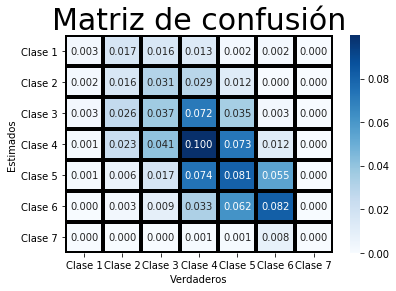

In [96]:
#ENtreno el modelo con los mejores parametros
knn = KNeighborsClassifier( n_neighbors = 20, weights = 'distance' )
knn.fit( X_Entrenamiento, Y_Entrenamiento )

#Imprimo la preduccion de sus valores
Impresion( knn , ImpresionManual = False)

## RNA

In [97]:

#Establecer el modelo
ValoresRNA = {'hidden_layer_sizes':((10), (16), (20), (30),(50), (10,10), (16,16), (20,20),(30,30),(50,50), (10,10,10),(16,16,16),(20,20,20),(30,30,30),(50,50,50) )}
Epocas     = 200
RNA        = MLPClassifier( activation='tanh', max_iter = Epocas)

#Entrenar el Modelo con los mejores Valores
GridRNA = GridSearchCV( RNA, ValoresRNA, cv=5 )
GridRNA.fit( X_Entrenamiento, Y_Entrenamiento )
  

#Obteniendo los valores  
MejoresResultadosRNA = GridRNA.best_params_
  
print( MejoresResultadosRNA )

/home/santiago/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/santiago/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/santiago/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/santiago/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

{'hidden_layer_sizes': (20, 20, 20)}


/home/santiago/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [98]:
df_RNAEntrenamiento = pd.DataFrame(GridRNA.cv_results_ )
df_RNAEntrenamiento = df_RNAEntrenamiento[['mean_test_score', 'std_test_score', 'param_hidden_layer_sizes','rank_test_score']]
df_RNAEntrenamiento


,mean_test_score,std_test_score,param_hidden_layer_sizes,rank_test_score
0,0.354570,0.030083,10,6
1,0.344306,0.022082,16,10
2,0.340891,0.015905,20,11
3,0.333621,0.016315,30,14
4,0.337040,0.016148,50,12
5,0.358432,0.016736,"(10, 10)",5
6,0.352432,0.009185,"(16, 16)",7
7,0.345166,0.009212,"(20, 20)",9
8,0.365688,0.012435,"(30, 30)",3
9,0.351568,0.016070,"(50, 50)",8


/home/santiago/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


PRECISION     :  0.3562874251497006
CLASIFICACION : 
               precision    recall  f1-score   support

           1       0.50      0.17      0.25        53
           2       0.25      0.28      0.26        90
           3       0.31      0.20      0.24       176
           4       0.35      0.43      0.38       250
           5       0.32      0.36      0.34       234
           6       0.49      0.51      0.50       189
           7       0.00      0.00      0.00        10

    accuracy                           0.36      1002
   macro avg       0.32      0.28      0.28      1002
weighted avg       0.36      0.36      0.35      1002



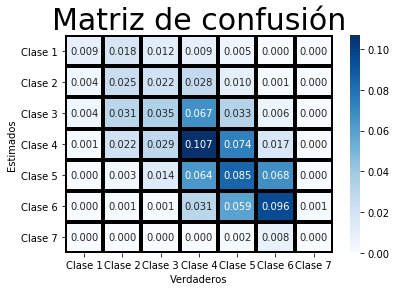

In [99]:
Epocas = 200

#Modelo con los mejores valores
RNAPrueba = MLPClassifier(hidden_layer_sizes=(16),activation='tanh', max_iter=Epocas)
RNAPrueba.fit(X_Entrenamiento, Y_Entrenamiento)

Impresion( RNAPrueba, ImpresionManual = False) 

## Random Forest

In [100]:
 #Preparamos los parametros del modelo
Valores      = {'n_estimators':(10, 20,50,75,100,150,200), 'max_depth':(5,10,20,30,50, 75, 100) }
RandomForest = RandomForestClassifier()

#Se toman los mejores valor
GridRandomForest = GridSearchCV( RandomForest, Valores, cv=5 )
GridRandomForest.fit( X_Entrenamiento, Y_Entrenamiento )
  
#obtengo las medias y los intervalos de confianza
MediasRandomForest                 = GridRandomForest.cv_results_['mean_test_score']
IntervalodeConfianzaRandomForest   = GridRandomForest.cv_results_['std_test_score']
MejoresResultadosRandomForest      = GridRandomForest.best_params_

print(MejoresResultadosRandomForest)

{'max_depth': 100, 'n_estimators': 75}


In [101]:
df_RandomForest = pd.DataFrame( GridRandomForest.cv_results_ )
df_RandomForest = df_RandomForest[['mean_test_score', 'std_test_score', 'param_max_depth','param_n_estimators','rank_test_score']]
df_RandomForest


,mean_test_score,std_test_score,param_max_depth,param_n_estimators,rank_test_score
0,0.387925,0.021525,5,10,31
1,0.392199,0.020317,5,20,21
2,0.396912,0.012337,5,50,13
3,0.401179,0.022482,5,75,6
4,0.402042,0.016994,5,100,5
5,0.393487,0.014501,5,150,18
6,0.398191,0.012892,5,200,11
7,0.361838,0.020974,10,10,47
8,0.389648,0.003958,10,20,27
9,0.391359,0.012999,10,50,24


In [102]:
#df_typesRandomForest = pd.DataFrame({
    #'Numero de arboles' : pd.Series([10,10,10,10,10,10,10,20,20,20,20,20,20,20,50,50,50,50,50,50,50,75,75,75,75,75,75,75,100,100,100,100,100,100,100,150,150,150,150,150,150,150,200,200,200,200,200,200,200]),
  #  'Numero de arboles' : pd.Series([[10]*8,[20]*8,[50]*8,[75]*8,[100]*8,[150]*8,[200]*8]),
 #   'Profundidad' : pd.Series([10,20,50,75,100,150,200]*7)})
#df_typesRandomForest["Eficiencia en validacion"] = MediasRandomForest
#df_typesRandomForest["Intervalo de confianza"]   = IntervalodeConfianzaRandomForest
#df_typesRandomForest

PRECISION     :  0.40219560878243515
CLASIFICACION : 
               precision    recall  f1-score   support

           1       0.71      0.32      0.44        53
           2       0.32      0.33      0.33        90
           3       0.34      0.25      0.29       176
           4       0.38      0.47      0.42       250
           5       0.35      0.38      0.37       234
           6       0.54      0.56      0.55       189
           7       0.00      0.00      0.00        10

    accuracy                           0.40      1002
   macro avg       0.38      0.33      0.34      1002
weighted avg       0.41      0.40      0.40      1002



/home/santiago/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


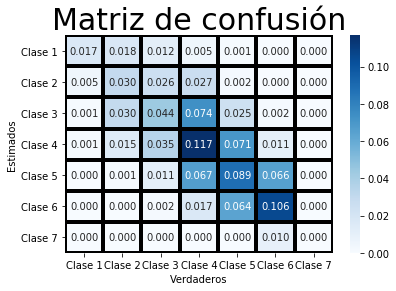

In [12]:
RandomForestPrueba = RandomForestClassifier( max_depth = 100, n_estimators = 75 )
RandomForestPrueba.fit( X_Entrenamiento, Y_Entrenamiento)

Impresion( RandomForestPrueba, ImpresionManual = False )

## Maquinas de soporte vectorial

In [14]:

 #Preparamos los parametros del modelo
Valores = {'kernel':('linear', 'rbf'), 'C':(0.05,0.5,1,1.5,2, 2.5, 3,3.5, 4, 5), 'gamma':(0.01, 0.05, 0.1, 0.5, 1) }
SVM = SVC()

 #Se toman los mejores valor
GridSVM = GridSearchCV( SVM, Valores, cv=5 )
GridSVM.fit( X_Entrenamiento, Y_Entrenamiento )
  
#obtengo las medias y los intervalos de confianza
MediasSVM                 = GridSVM.cv_results_['mean_test_score']
IntervalodeConfianzaSVM   = GridSVM.cv_results_['std_test_score']
MejoresResultadosSVM      = GridSVM.best_params_

print( MejoresResultadosSVM)

{'C': 3.5, 'gamma': 0.01, 'kernel': 'linear'}


In [17]:
df_SVM = pd.DataFrame( GridSVM.cv_results_ )
df_SVM = df_SVM[['mean_test_score', 'std_test_score', 'param_C','param_gamma','param_kernel','rank_test_score']]
df_SVM

,mean_test_score,std_test_score,param_C,param_gamma,param_kernel,rank_test_score
0,0.348152,0.022971,0.05,0.01,linear,40
1,0.265182,0.008495,0.05,0.01,rbf,96
2,0.348152,0.022971,0.05,0.05,linear,40
3,0.297256,0.012802,0.05,0.05,rbf,79
4,0.348152,0.022971,0.05,0.1,linear,40
...,...,...,...,...,...,...
95,0.325487,0.006862,5,0.1,rbf,77
96,0.359278,0.024726,5,0.5,linear,6
97,0.294258,0.018785,5,0.5,rbf,85
98,0.359278,0.024726,5,1,linear,6


PRECISION     :  0.3582834331337325
CLASIFICACION : 
               precision    recall  f1-score   support

           1       0.50      0.02      0.04        53
           2       0.26      0.42      0.32        90
           3       0.33      0.01      0.01       176
           4       0.32      0.58      0.41       250
           5       0.36      0.36      0.36       234
           6       0.53      0.48      0.50       189
           7       0.00      0.00      0.00        10

    accuracy                           0.36      1002
   macro avg       0.33      0.27      0.24      1002
weighted avg       0.37      0.36      0.32      1002



/home/santiago/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


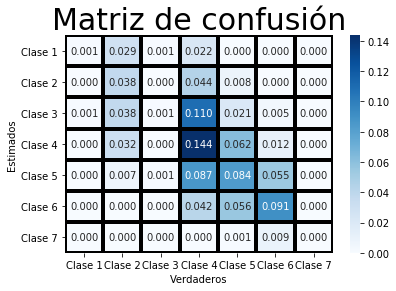

In [19]:
SVMPrueba = SVC( C=3, gamma=0.01,kernel='linear', probability=True)
SVMPrueba.fit( X_Entrenamiento, Y_Entrenamiento )

Impresion( SVMPrueba , ImpresionManual = False)

# MATRIZ DE CORRELACION

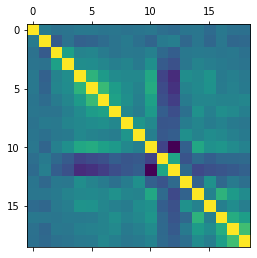

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.000000,0.114929,0.017173,0.004757,0.023352,0.086800,0.053623,0.043804,0.011084,0.013819,0.039343,0.057401,-0.013083,-0.010141,0.029354,-0.069618,0.057000,-0.017869,0.016743
1,0.114929,1.000000,-0.143572,-0.027987,-0.060191,-0.109293,-0.090072,0.006141,0.043639,-0.005681,-0.158770,0.059082,-0.023458,0.017733,0.014944,-0.109428,0.032158,-0.102900,-0.011386
2,0.017173,-0.143572,1.000000,0.028558,0.052779,0.174394,0.142778,0.059385,0.087928,0.057916,0.153266,-0.010415,-0.046274,-0.030311,0.048973,0.028933,0.031124,0.015916,-0.053733
3,0.004757,-0.027987,0.028558,1.000000,-0.012616,0.127576,0.064768,0.011942,-0.006020,0.007644,0.059943,-0.008478,-0.009312,-0.009634,0.033050,0.020375,-0.006152,-0.015857,-0.004725
4,0.023352,-0.060191,0.052779,-0.012616,1.000000,0.084651,0.108355,0.044120,0.038358,0.019172,0.127692,0.037434,-0.052385,-0.003233,0.048020,0.051978,-0.018650,0.027412,0.009452
5,0.086800,-0.109293,0.174394,0.127576,0.084651,1.000000,0.488240,0.280565,0.162194,0.105811,0.369757,0.060244,-0.036572,0.019439,0.095250,0.143424,0.013364,0.060479,0.012103
6,0.053623,-0.090072,0.142778,0.064768,0.108355,0.488240,1.000000,0.438972,0.222816,0.157674,0.441086,0.015873,-0.077382,0.008158,0.172997,0.154495,0.147186,0.110282,0.054394
7,0.043804,0.006141,0.059385,0.011942,0.044120,0.280565,0.438972,1.000000,0.129642,0.104387,0.366109,-0.019882,-0.064574,-0.017177,0.280043,0.124486,0.261059,0.164303,0.044922
8,0.011084,0.043639,0.087928,-0.006020,0.038358,0.162194,0.222816,0.129642,1.000000,0.191511,0.165314,-0.028873,-0.031382,-0.024855,0.149929,0.081974,0.166520,0.000363,0.005386
9,0.013819,-0.005681,0.057916,0.007644,0.019172,0.105811,0.157674,0.104387,0.191511,1.000000,0.118900,-0.039595,-0.007349,0.004733,0.154754,0.205894,0.192134,0.094429,-0.003434


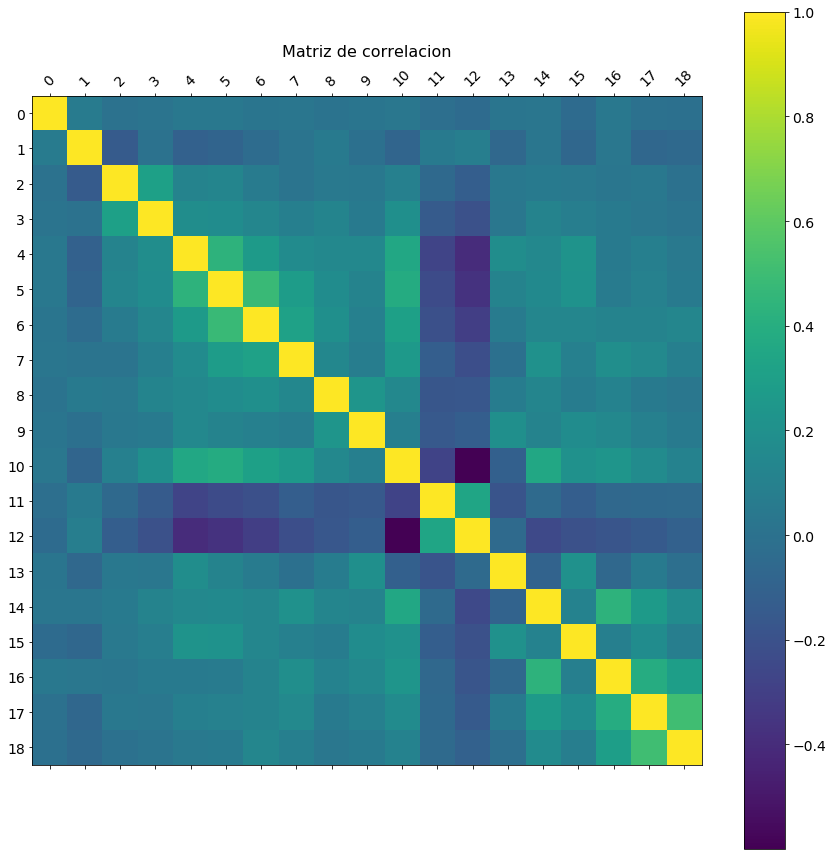

In [20]:
import matplotlib.pyplot as plt
df = pd.DataFrame(X_Prueba)
plt.matshow(df.corr(method ='kendall'))
plt.show()
f = plt.figure(figsize=(15, 15))
plt.matshow(df.corr(method ='kendall'), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matriz de correlacion', fontsize=16);
df.corr(method ='pearson')

In [21]:
def IndiceDeFisher( X, plot=True ):
    Clases  = X.shape[ 1 ]
    Indices = np.zeros( 19 )
    
    #print(pd.DataFrame(X))
    j = 0
    
    for i in range( Clases ):
        if_j = 0
        
        for k in range( Clases ):
            
            if i == k:
                continue
                
            Media_i = np.mean( X[ :, i] )
            Media_k = np.mean( X[ :, k] )
            
            IntervaloDeConfianza_i = np.std( X[ :, i] )
            IntervaloDeConfianza_k = np.std( X[ :, k] )

            if_j  += (( Media_i - Media_k )**2 )/ ( IntervaloDeConfianza_i**2 + IntervaloDeConfianza_k**2 )
            
        Indices[j] = if_j
        j += 1

    Indices = Indices / np.max(Indices)
  
    if plot == True:
        
        x = np.array(np.linspace( 0, Clases, Clases, endpoint=True ))
        y = Indices
        
        plt.stem   ( x, y)
        plt.xlabel ('CLASES')
        plt.ylabel ('INDICE DE FISHER')
        plt.show   ()  
        
        
    return Indices

/home/santiago/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


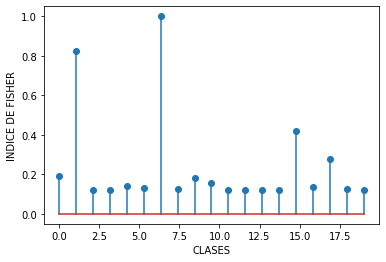

array([0.19067995, 0.82217794, 0.12030267, 0.12152494, 0.13923501,
       0.13324827, 1.        , 0.12719954, 0.17917647, 0.15629994,
       0.1199114 , 0.12296334, 0.12187709, 0.12088064, 0.41887136,
       0.13656666, 0.27692435, 0.12597057, 0.12256126])

In [22]:
IndiceDeFisher(X)

## Selección

In [23]:
def Seleccion( Modelo, Caracteristicas, HaciaAdelante):
      
  

  RandomForestPrueba = RandomForestClassifier(max_depth=10,n_estimators=50)
  RandomForestPrueba.fit( X_Entrenamiento, Y_Entrenamiento)
  Tiempo_i = time.time()


  SeleccionHaciaAdelante = SFS( RandomForestPrueba, k_features = Caracteristicas, forward = HaciaAdelante, floating=False, verbose=1, scoring='accuracy', cv=5 )
  SeleccionHaciaAdelante = SeleccionHaciaAdelante.fit(X_Entrenamiento, Y_Entrenamiento)
  
  EficienciaSelecion     = SeleccionHaciaAdelante.k_score_
  CaracteristicasTomadas = SeleccionHaciaAdelante.k_feature_idx_


  Tiempo = time.time() - Tiempo_i
  
  print('Modelo                       : ', Modelo )
  print('Numero de Caracteristicas    : ', Caracteristicas )
  print('Hacia Adelante               : ', HaciaAdelante )
  print('Eficiencia                   : ', EficienciaSelecion  )
  print('Carcateristicas selecionadas : ', CaracteristicasTomadas )
  print('Tiempo                       : ', Tiempo )
      

  return EficienciaSelecion, CaracteristicasTomadas, Tiempo

In [24]:
#Seleccion('RandomForest',1,True)

In [25]:
  #  'Numero de arboles' : pd.Series([[10]*8,[20]*8,[50]*8,[75]*8,[100]*8,[150]*8,[200]*8]),
   
df_Seleccion = pd.DataFrame({
    'Modelo'          : pd.Series( ['RandonForest']*5 ),
    'Caracteristicas' : pd.Series( [ 3,5,7,9,11 ] ),
    'HaciaAdelante'   : pd.Series( [True]*5 )
   })


df_Seleccion [ "Error de validación "   ] = ""
df_Seleccion [ "Tiempo de ejecución "   ] = ""
df_Seleccion [ "Indices "               ] = ""


df_Seleccion.set_index( ['Modelo','Caracteristicas', 'HaciaAdelante'], inplace=True )

for i in df_Seleccion.index:

    Eficiencia, Indices, Tiempo = Seleccion(i[0], i[1], i[2])
    
    df_Seleccion [ "Error de validación "    ][i] = Eficiencia
    df_Seleccion [ "Tiempo de ejecución "    ][i] = Tiempo
    df_Seleccion [ "Indices "                ][i] = Indices

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   10.1s finished
Features: 1/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   16.3s finished
Features: 2/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   16.9s finished
Features: 3/3

Modelo                       :  RandonForest
Numero de Caracteristicas    :  3
Hacia Adelante               :  True
Eficiencia                   :  0.377661560423873
Carcateristicas selecionadas :  (3, 5, 12)
Tiempo                       :  43.25135803222656


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   16.2s finished
Features: 1/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   15.9s finished
Features: 2/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   17.1s finished
Features: 3/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   18.7s finished
Features: 4/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   16.5s finished
Features: 5/5

Modelo                       :  RandonForest
Numero de Caracteristicas    :  5
Hacia Adelante               :  True
Eficiencia                   :  0.3909377916872564
Carcateristicas selecionadas :  (3, 5, 11, 12, 17)
Tiempo                       :  84.38722515106201


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   14.4s finished
Features: 1/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   15.7s finished
Features: 2/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   14.4s finished
Features: 3/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   17.8s finished
Features: 4/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   18.5s finished
Features: 5/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   16.9s finished
Features: 6/7[Parallel(n_jobs

Modelo                       :  RandonForest
Numero de Caracteristicas    :  7
Hacia Adelante               :  True
Eficiencia                   :  0.4097384651988506
Carcateristicas selecionadas :  (3, 5, 7, 8, 11, 12, 16)
Tiempo                       :  113.45264983177185


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   14.8s finished
Features: 1/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   17.0s finished
Features: 2/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   16.2s finished
Features: 3/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   20.0s finished
Features: 4/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   18.8s finished
Features: 5/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   17.6s finished
Features: 6/9[Parallel(n_jobs

Modelo                       :  RandonForest
Numero de Caracteristicas    :  9
Hacia Adelante               :  True
Eficiencia                   :  0.40120060762459053
Carcateristicas selecionadas :  (3, 5, 6, 7, 8, 9, 10, 13, 14)
Tiempo                       :  154.1702959537506


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   16.8s finished
Features: 1/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   17.1s finished
Features: 2/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   17.1s finished
Features: 3/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   20.7s finished
Features: 4/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   18.8s finished
Features: 5/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   17.3s finished
Features: 6/11[Parallel(

Modelo                       :  RandonForest
Numero de Caracteristicas    :  11
Hacia Adelante               :  True
Eficiencia                   :  0.3956185142480646
Carcateristicas selecionadas :  (1, 3, 5, 7, 8, 10, 11, 12, 13, 16, 18)
Tiempo                       :  184.10817646980286


In [26]:
df_Seleccion

Error de validación   \
Modelo       Caracteristicas HaciaAdelante                        
RandonForest 3               True                      0.377662   
             5               True                      0.390938   
             7               True                      0.409738   
             9               True                      0.401201   
             11              True                      0.395619   

                                           Tiempo de ejecución   \
Modelo       Caracteristicas HaciaAdelante                        
RandonForest 3               True                       43.2514   
             5               True                       84.3872   
             7               True                       113.453   
             9               True                        154.17   
             11              True                       184.108   

                                                                           Indices   
Modelo       Caracteristicas HaciaAdelante                                           
RandonForest 3               True                                        (3, 5, 12)  
             5               True                                (3, 5, 11, 12, 17)  
             7               True                          (3, 5, 7, 8, 11, 12, 16)  
             9               True                    (3, 5, 6, 7, 8, 9, 10, 13, 14)  
             11              True           (1, 3, 5, 7, 8, 10, 11, 12, 13, 16, 18)

# SELECCION: MODELOS

## Data

In [27]:

X_SeleccionEntrenamiento = X_Entrenamiento[:,[3,5,7,8,11,12,16]]
X_SeleccionPrueba        = X_Prueba[:,[3,5,7,8,11,12,16]]


## Auxiliar Seleccion

In [28]:
#Metodo para comparar los valores del modelo con la muestra de test extraida
def ImpresionSeleccion( ModeloEntrenado, MediaEntrenamiento = 0, DesviacionMediaEntrenamiento = 0, MediaValidacion = 0, DesviacionMediaValidacion = 0, Tiempo = 0, ImpresionManual = True):
    
    

    PrediccionDelModelo = ModeloEntrenado.predict( X_SeleccionPrueba )
    
    print('PRECISION     : ',   accuracy_score( Y_Prueba, PrediccionDelModelo ) )
    print('CLASIFICACION : \n', classification_report( Y_Prueba, PrediccionDelModelo ) )
    

    #Clases de la matriz
    Columnas =['Clase %s'%(i) for i in range(1, len(np.unique(Y)) + 1)]
    

    
    #Matris de confusion
    MatrizDeConfusion    = confusion_matrix( Y_Prueba, PrediccionDelModelo, normalize = 'all' )
    df_MatrizDeConfusion = pd.DataFrame( MatrizDeConfusion , index = Columnas, columns = Columnas)
    
    Matriz = sns.heatmap( df_MatrizDeConfusion, cmap = 'Blues', annot = True, fmt = ".3f",linecolor="k",linewidths=3 )
    Matriz.set(xlabel = 'Verdaderos', ylabel = 'Estimados')
    plt.title("Matriz de confusión",fontsize=30)

    
    #Impresion de valores Manuales
    if ImpresionManual == True:
         print(  'Eficiencia Entrenamiento : ' +  str( MediaEntrenamiento ) + ' +/- ' + str( DesviacionMediaEntrenamiento ))
         print(  'Eficiencia Validacion :    ' +  str( MediaValidacion)     + ' +/- ' + str( DesviacionMediaValidacion ))
         print(  'Tiempo :                   ' +  str(Tiempo))
    
    
    

## Seleccion: Random Forest 

PRECISION     :  0.3962075848303393
CLASIFICACION : 
               precision    recall  f1-score   support

           1       0.36      0.15      0.21        53
           2       0.24      0.23      0.23        90
           3       0.34      0.26      0.30       176
           4       0.38      0.42      0.39       250
           5       0.38      0.47      0.42       234
           6       0.57      0.56      0.56       189
           7       1.00      0.10      0.18        10

    accuracy                           0.40      1002
   macro avg       0.47      0.31      0.33      1002
weighted avg       0.40      0.40      0.39      1002



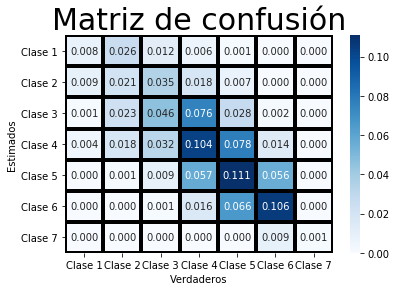

In [29]:
RandomForestPrueba = RandomForestClassifier(max_depth=10,n_estimators=50)
RandomForestPrueba.fit( X_SeleccionEntrenamiento, Y_Entrenamiento)

ImpresionSeleccion( RandomForestPrueba, ImpresionManual = False )


## Selecion: Knn

PRECISION     :  0.31137724550898205
CLASIFICACION : 
               precision    recall  f1-score   support

           1       0.37      0.13      0.19        53
           2       0.18      0.20      0.19        90
           3       0.28      0.23      0.25       176
           4       0.29      0.31      0.30       250
           5       0.30      0.33      0.32       234
           6       0.43      0.48      0.46       189
           7       0.00      0.00      0.00        10

    accuracy                           0.31      1002
   macro avg       0.26      0.24      0.24      1002
weighted avg       0.31      0.31      0.31      1002



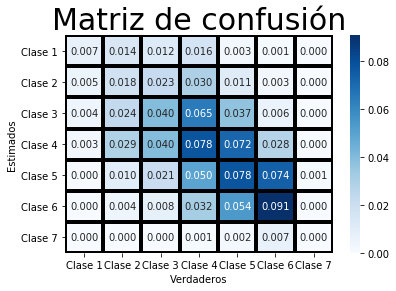

In [30]:
#ENtreno el modelo con los mejores parametros
knn = KNeighborsClassifier( n_neighbors = 20, weights = 'distance' )
knn.fit( X_SeleccionEntrenamiento, Y_Entrenamiento )

#Imprimo la preduccion de sus valores
ImpresionSeleccion( knn , ImpresionManual = False)

## Seleccion: RNA

/home/santiago/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


PRECISION     :  0.3502994011976048
CLASIFICACION : 
               precision    recall  f1-score   support

           1       0.42      0.15      0.22        53
           2       0.27      0.31      0.29        90
           3       0.29      0.23      0.25       176
           4       0.34      0.35      0.34       250
           5       0.31      0.35      0.33       234
           6       0.49      0.56      0.52       189
           7       0.00      0.00      0.00        10

    accuracy                           0.35      1002
   macro avg       0.30      0.28      0.28      1002
weighted avg       0.35      0.35      0.34      1002



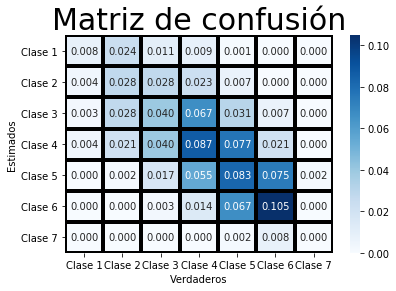

In [31]:
Epocas = 200

#Modelo con los mejores valores
RNAPrueba = MLPClassifier(hidden_layer_sizes=(16,16,16),activation='tanh', max_iter=Epocas)
RNAPrueba.fit(X_SeleccionEntrenamiento, Y_Entrenamiento)

ImpresionSeleccion( RNAPrueba, ImpresionManual = False) 

# EXTRACCION

### Modelos

In [35]:
 # Ajuste de los modelos para usarlos en el Metodos
    
RNAExtraccion          = MLPClassifier(hidden_layer_sizes=(16,16,16),activation='tanh', max_iter=Epocas)
KnnExtraccion          = KNeighborsClassifier( n_neighbors = 20, weights = 'distance' )
RandomForestExtraccion = RandomForestClassifier(max_depth=10,n_estimators=50)


# Metodos

In [55]:
def Extract_features(tipo, n):
    
  if tipo == 'pca':
    ext = PCA(n_components=n)
    return ext

  elif tipo == 'lda':
    ext = LDA(n_discriminants=n)
    return ext

  else:
    print ("Ingrese un método válido (pca o lda)\n")
    
    
def classification_error(y_est, y_real):
    
    err = 0
    
    for y_e, y_r in zip(y_est, y_real):

        if y_e  != y_r:
            err += 1

    return err/np.size(y_est)

In [68]:
def Extraccion( Tecnica, Modelo, Caracteristicas, X):
    
  
  Tiempo_i   = time.time()                       #Para calcular el costo computacional
  X_Extraido = X.copy()                          #Estandarizamos los datos
  Errores    = np.ones(5)
  Fold       = StratifiedKFold(n_splits=5)       #Implemetamos la metodología de validación cross validation con 5 folds
  j          = 0

  for FoldEntrenamiento, FoldPrueba in Fold.split( X_Extraido, Y ):

      #Aquí se aplica la extracción de características por PCA
        
      CaracteristicasExtraidas = Extract_features(Tecnica,Caracteristicas)
      CaracteristicasExtraidas = CaracteristicasExtraidas.fit(X_Extraido)    #Ajuste del Modelo

      #Transforme las variables y genere el nuevo espacio de características de menor dimensión
      X_ex = CaracteristicasExtraidas.transform(X_Extraido)

      #Se aplica CV-5
      X_Entrenado, X_Probado = X_ex[FoldEntrenamiento], X_ex[FoldPrueba]
      Y_Entrenado, Y_Probado = Y[FoldEntrenamiento], Y[FoldPrueba]  


      # Entrenamiento el modelo.
      ModeloCompleto = Modelo.fit( X_Entrenado, Y_Entrenado )

      # Validación del modelo
      Y_Predicho = ModeloCompleto.predict( X_Probado )
    
      Errores[j] = classification_error( Y_Predicho, Y_Prueba )
      j+=1

  
  Tiempo               =  time.time() - Tiempo_i
  Error                =  np.mean( Errores )
  Eficiencia           =  ( 1-np.mean( Errores ) )*100
  IntervaloDeConfianza =  np.std( Errores )


  print ( "Error de validación aplicando extracción      :  " + str( Error )      +  " +/- " + str( IntervaloDeConfianza ) )
  print ( "Eficiencia en validación aplicando extracción :  " + str( Eficiencia ) +  "%" )
  print ( "Tiempo de ejecución                           :  " + str( Tiempo )     +  ' segundos.\n' )
  
  return Tiempo, Error, IntervaloDeConfianza

In [69]:
Extraccion('pca', RNAExtraccion, 1, X )

Error de validación aplicando extracción      :  0.7853293413173652 +/- 0.019941108748918218
Eficiencia en validación aplicando extracción :  21.46706586826348%
Tiempo de ejecución                           :  8.150059461593628 segundos.



(8.150059461593628, 0.7853293413173652, 0.019941108748918218)

In [70]:
df_types = pd.DataFrame({
    'modelo'          : pd.Series( [ 'RNAExtraccion' ]*7 + [ 'Knn' ]*7 + [ 'RandomForest' ]*7 ),
    'caracteristicas' : pd.Series( [ 3,5,7,8,11,12,16 ]*3),
   })
df_types["Error de validación"] = ""
df_types["IC(std)"]             = ""
df_types["Tiempo de ejecución"] = ""


df_types.set_index(['modelo','caracteristicas'], inplace=True)

for i in df_types.index:
  if i[0] == 'knn':
    model = KnnExtraccion
    
  elif i[0] == 'RNA':
    model = RNAExtraccion
    
  else:
    model = RandomForestExtraccion
    
  tiempo, error, IC = Extraccion('pca', model, i[1], X )
    
  df_types["Error de validación"][i] = error
  df_types["IC(std)"][i] = IC
  df_types["Tiempo de ejecución"][i] = tiempo


Error de validación aplicando extracción      :  0.7691616766467065 +/- 0.010258587843719637
Eficiencia en validación aplicando extracción :  23.083832335329348%
Tiempo de ejecución                           :  3.616760015487671 segundos.

Error de validación aplicando extracción      :  0.7751497005988024 +/- 0.014151260237241265
Eficiencia en validación aplicando extracción :  22.48502994011976%
Tiempo de ejecución                           :  4.017566680908203 segundos.

Error de validación aplicando extracción      :  0.7823353293413173 +/- 0.022891957908521277
Eficiencia en validación aplicando extracción :  21.766467065868266%
Tiempo de ejecución                           :  5.645094633102417 segundos.

Error de validación aplicando extracción      :  0.7790419161676646 +/- 0.01447071374083183
Eficiencia en validación aplicando extracción :  22.09580838323354%
Tiempo de ejecución                           :  4.2262959480285645 segundos.

Error de validación aplicando extracción  

In [71]:
df_types

Error de validación     IC(std)  \
modelo        caracteristicas                                   
RNAExtraccion 3                          0.769162   0.0102586   
              5                           0.77515   0.0141513   
              7                          0.782335    0.022892   
              8                          0.779042   0.0144707   
              11                         0.775449    0.011976   
              12                         0.778144   0.0154242   
              16                         0.773353  0.00986662   
Knn           3                          0.767665   0.0154823   
              5                          0.781138   0.0201824   
              7                          0.776347   0.0155458   
              8                          0.770958   0.0150596   
              11                         0.787126   0.0173911   
              12                         0.775749   0.0155112   
              16                         0.772156   0.0141196   
RandomForest  3                          0.762575   0.0189263   
              5                          0.768263   0.0176723   
              7                           0.78024    0.017974   
              8                           0.77994   0.0227427   
              11                         0.783533   0.0200532   
              12                         0.782335    0.024591   
              16                         0.786527    0.017422   

                              Tiempo de ejecución  
modelo        caracteristicas                      
RNAExtraccion 3                           3.61676  
              5                           4.01757  
              7                           5.64509  
              8                            4.2263  
              11                          6.16095  
              12                          4.67932  
              16                          4.90668  
Knn           3                           4.83992  
              5                           4.48835  
              7                           4.11255  
              8                           4.33337  
              11                          6.49557  
              12                          4.59184  
              16                          6.53693  
RandomForest  3                           3.95401  
              5                           4.36752  
              7                           4.95736  
              8                           5.26499  
              11                           4.4297  
              12                          5.82141  
              16                          5.91744